In [6]:
# 导入乳腺癌数据集
from sklearn.datasets import load_breast_cancer
# 导入 BP 模型
from sklearn.neural_network import MLPClassifier
# 导入训练集分割方法
from sklearn.model_selection import train_test_split
# 导入预测指标计算函数和混淆矩阵计算函数
from sklearn.metrics import classification_report, confusion_matrix
# 导入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# 导入乳腺癌数据集
cancer = load_breast_cancer()

In [7]:
# 分割数据为训练集和测试集
cancer_data = cancer['data']
print('cancer_data 数据维度为：', cancer_data.shape)
cancer_target = cancer['target']
print('cancer_target 标签维度为：', cancer_target.shape)
cancer_names = cancer['feature_names']
cancer_desc = cancer['DESCR']

# 分为训练集与测试集
cancer_data_train, cancer_data_test, cancer_target_train, cancer_target_test = train_test_split(
    cancer_data, cancer_target, test_size=0.2, random_state=42
)

# 数据标准化
scaler = StandardScaler()
cancer_data_train = scaler.fit_transform(cancer_data_train)
cancer_data_test = scaler.transform(cancer_data_test)

cancer_data 数据维度为： (569, 30)
cancer_target 标签维度为： (569,)


In [8]:
# 建立 BP 模型, 采用 Adam 优化器，relu 非线性映射函数
BP = MLPClassifier(
    hidden_layer_sizes=(100,),  # 隐藏层大小，可以根据需要调整
    activation='relu',          # 激活函数
    solver='adam',              # 优化器
    max_iter=1000,              # 最大迭代次数，确保收敛
    random_state=42
)

# 进行模型训练
BP.fit(cancer_data_train, cancer_target_train)

MLPClassifier(max_iter=1000, random_state=42)

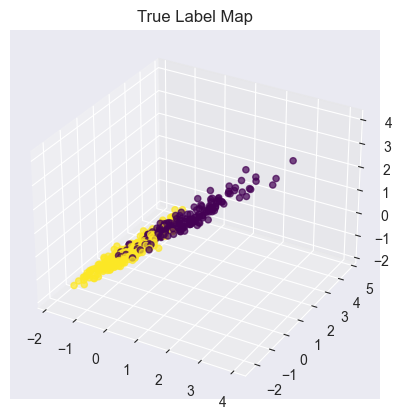

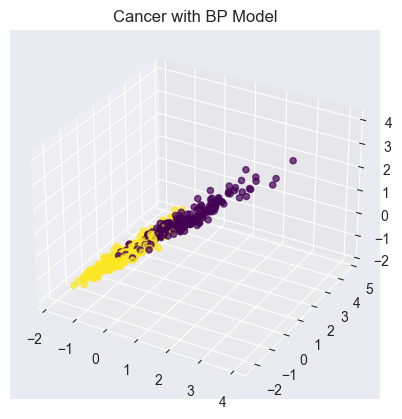

In [9]:
# 进行模型预测
predict_train_labels = BP.predict(cancer_data_train)

# 可视化真实数据
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    cancer_data_train[:, 0], 
    cancer_data_train[:, 1], 
    cancer_data_train[:, 2],
    marker='o', 
    c=cancer_target_train,
    cmap='viridis',
    alpha=0.7
)
plt.title('True Label Map')
plt.show()

# 可视化预测数据
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    cancer_data_train[:, 0], 
    cancer_data_train[:, 1], 
    cancer_data_train[:, 2],
    marker='o', 
    c=predict_train_labels,
    cmap='viridis',
    alpha=0.7
)
plt.title('Cancer with BP Model')
plt.show()

预测准确率: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



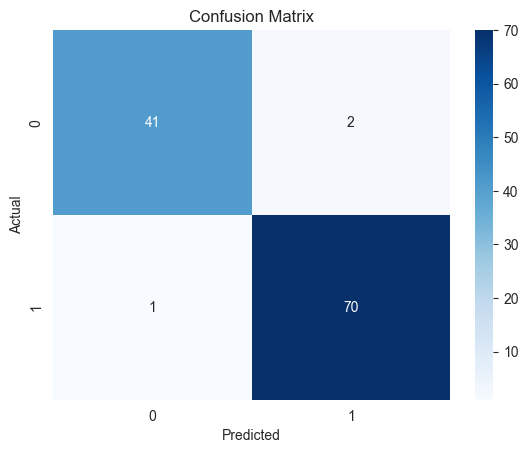

In [10]:
# 显示预测分数
print("预测准确率: {:.4f}".format(BP.score(cancer_data_test, cancer_target_test)))
predict_test_labels = BP.predict(cancer_data_test)

# 进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1 分数
print(classification_report(cancer_target_test, predict_test_labels))

# 绘制混淆矩阵
cm = confusion_matrix(cancer_target_test, predict_test_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()